In [1]:
import numpy as np
#definition of pca used in assignment1
#C is the center of data
#D is sorted eigenvalues
#U is sorted eigen vectors
#Z is reconstruction od the data
#Y is denoised reconstruction
#The most important part of this implementation is to make sure the relation between Z and Y, the equation of Y is: \widehat{\boldsymbol{x}}=\boldsymbol{\mu}+\sum_{i=1}^m \mathbf{u}_i\left(\boldsymbol{x}^{\top} \mathbf{u}_i\right)
def pca(X, m):
    C = np.mean(X, axis=0)
    X_centered = X - C
    Cov = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(Cov)
    idx = np.argsort(eigenvalues)[::-1] 
    sorted_eigenvalues = eigenvalues[idx]
    sorted_eigenvectors = eigenvectors[:, idx]
    D = sorted_eigenvalues[:m]
    U = sorted_eigenvectors[:, :m] 
    Z = np.dot(X_centered, U)
    Y = np.dot(Z, U.T) + C
    return C, D, U, Z, Y

In [3]:
from scipy.io import loadmat
# Load mat data -->the key is to check the key in the mat data and find X and y
#it's better to do check the shape
data = loadmat('/Users/yanqingluo/Desktop/LabML/problem_set1/data/usps.mat')
for key in data.keys():
    print(key)
X = data['data_patterns']
X =  np.array(X)
y = data['data_labels']
print(X.shape, y.shape, len(X),len(y))
#256 features for X and 2007 samples

__header__
__version__
__globals__
data_labels
data_patterns
(256, 2007) (10, 2007) 256 10


In [4]:
import matplotlib.pyplot as plt
#define visualize function for eigenvalues using abr plot
def plot_eigenvalues(D):
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(D) + 1), D)
    plt.xlabel('Index of Eigenvalues')
    plt.ylabel('Magnitude of Eigenvalues')
    plt.grid(True)
    plt.show()

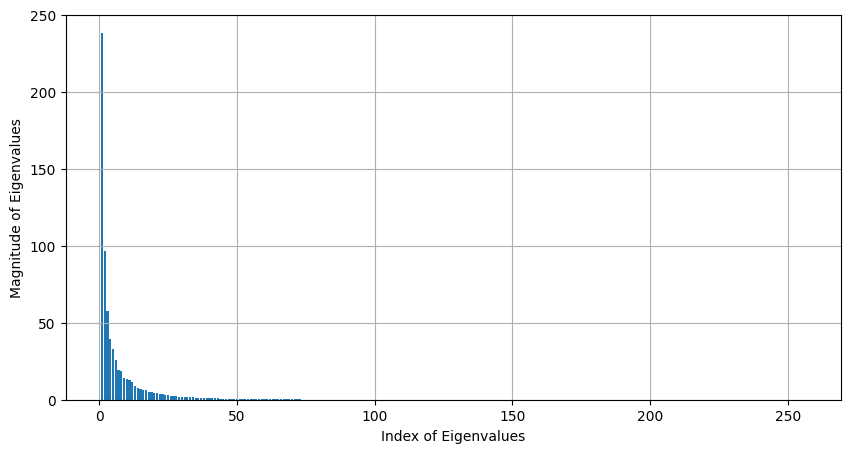

In [6]:
## Visualize all principle values(eigenvalues) --> in 256 dimensions
C_all, D_all, U_all, Z_all, Y_all = pca(X, 256)
plot_eigenvalues(D_all)


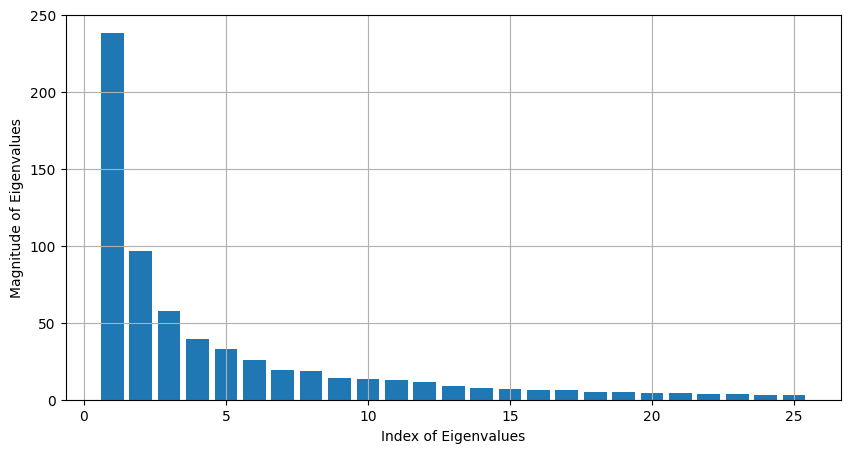

In [7]:
## plot the largest 25 principle values
D_largest_25 = D_all[:25]
plot_eigenvalues(D_largest_25)

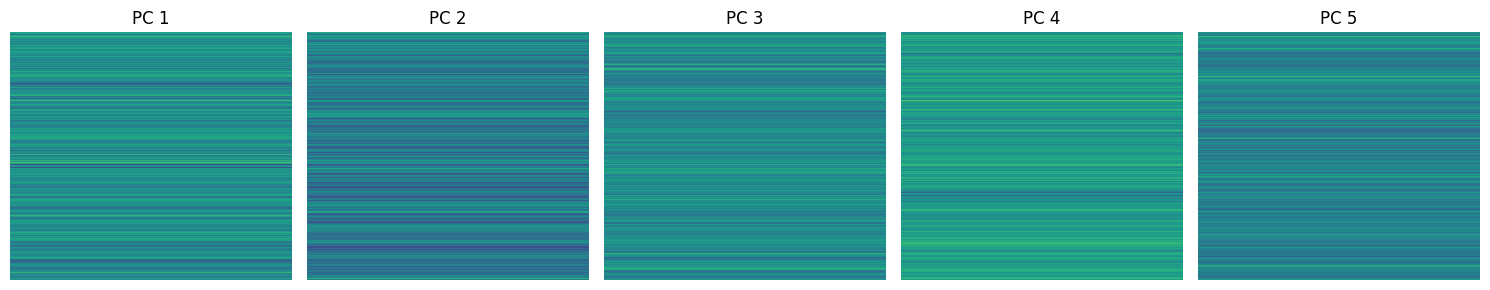

In [8]:
## plot the first 5 principle directions as images
U_largest_5 = U_all[:, :5]
image_shape = (2007, 1)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    # Reshape the i-th principal component to 28x28 and plot it
    pc_image = U_largest_5[:, i].reshape(image_shape)
    ax.imshow(pc_image, cmap='viridis', aspect='auto')
    ax.set_title(f'PC {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
## add noise to the data
def add_gaussian_noise(X, sigma):
    noise = np.random.normal(0, sigma, X.shape)
    return X + noise

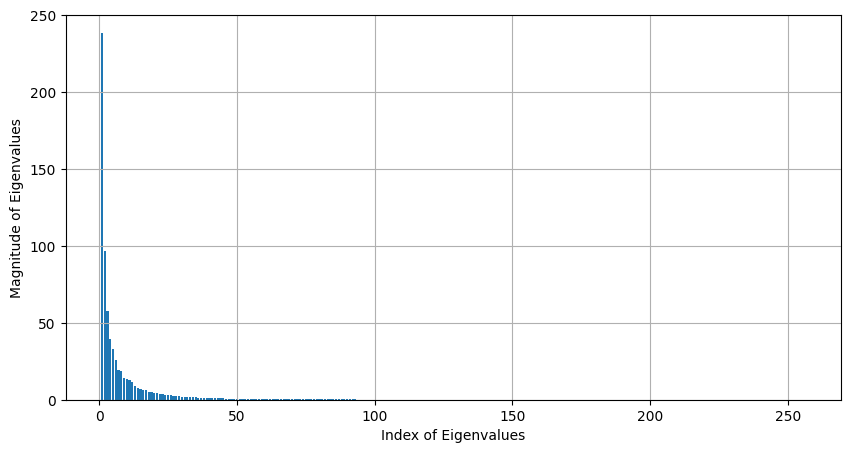

In [10]:
## add low Gaussian noise
X_low_noise = add_gaussian_noise(X, 0.1)
## plot the eigen values
C_low_noise, D_low_noise, U_low_noise, Z_low_noise, Y_low_noise = pca(X_low_noise, 256)
plot_eigenvalues(D_low_noise)

best m is 80


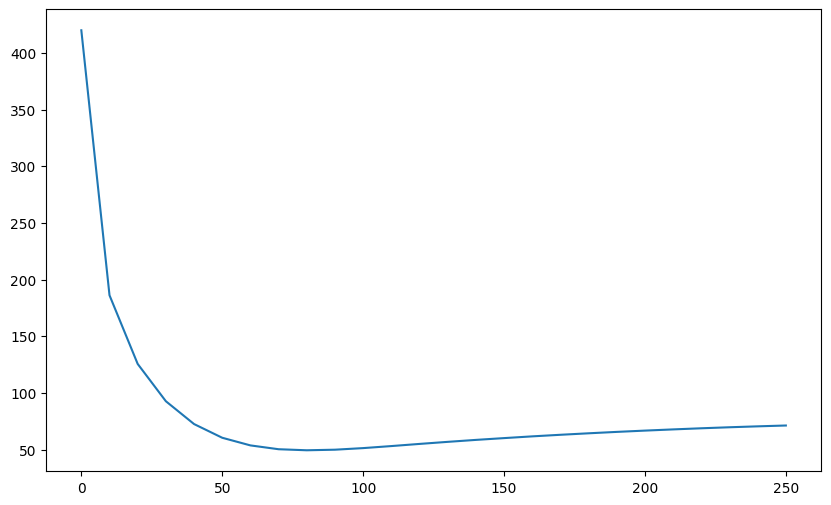

In [12]:
## find the best m for reconstruction from the projection
## calculate the loss based on the distance between reconstruction and true value(label)
## plot the loss corresponding to m list
def loss(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred)

def loss_plot(data):
    m_list = np.arange(256)[::10]
    loss_list = []
    for m in m_list:
        C_i, D_i, U_i, Z_i, Y_i = pca(data, m)
        loss_list.append(loss(X, Y_i))
    min_loss = np.argmin(loss_list)
    best_m = m_list[min_loss]
    print(f'best m is {best_m}')
    plt.figure(figsize=(10,6))
    plt.plot(m_list, loss_list)
    plt.show()

loss_plot(X_low_noise)

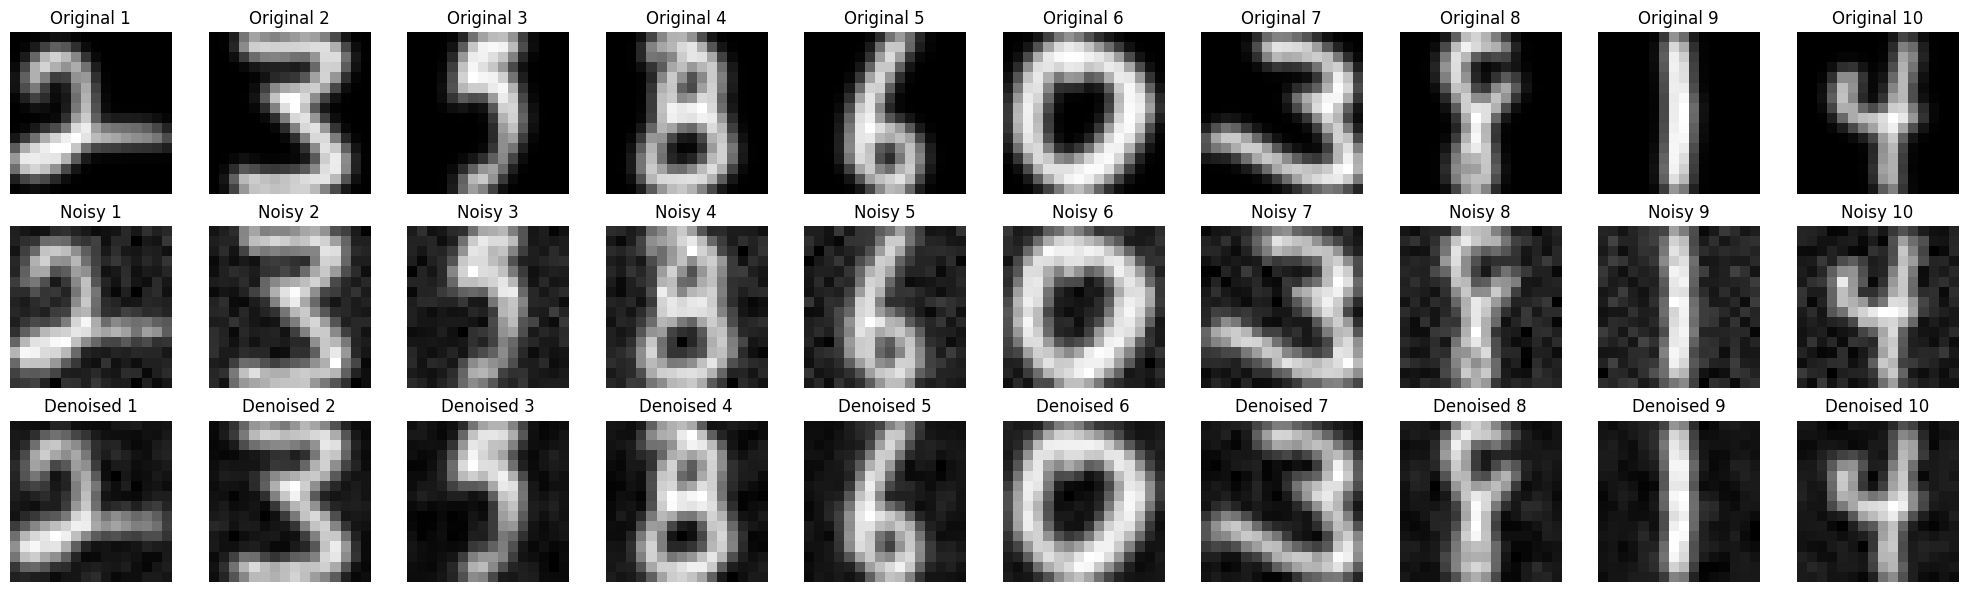

In [17]:
## 10 random examples from 2007 samples to show their original image, noisy image and denoised image

def show_images(X, X_noise, Y, m):
    image_shape = (16, 16)  # Example, adjust based on your actual data (e.g., sqrt(256) = 16)
    C, D, U, Z, Y = pca(X_noise, m)
    # Select 10 random indices from the dataset
    random_indices = np.random.choice(2007, 10, replace=False)

    # Create a figure with 3 rows of 10 images each
    fig, axes = plt.subplots(3, 10, figsize=(20, 6))

    for i in range(10):
        # Original images - reshape from X
        img_original = X[:, random_indices[i]].reshape(image_shape)
        axes[0, i].imshow(img_original, cmap='gray')
        axes[0, i].set_title(f'Original {i+1}')
        axes[0, i].axis('off')

        # Noisy images - reshape from data_low_noise
        img_noisy = X_noise[:, random_indices[i]].reshape(image_shape)
        axes[1, i].imshow(img_noisy, cmap='gray')
        axes[1, i].set_title(f'Noisy {i+1}')
        axes[1, i].axis('off')

        # Denoised images - reshape from Y_low_80
        img_denoised = Y[:, random_indices[i]].reshape(image_shape)
        axes[2, i].imshow(img_denoised, cmap='gray')
        axes[2, i].set_title(f'Denoised {i+1}')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

show_images(X, X_low_noise, Y_low_noise, 80)

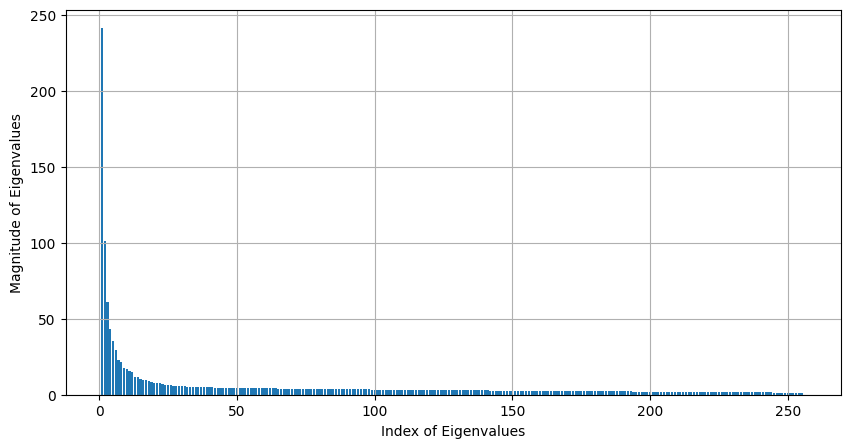

In [14]:
## High gaussian noise case
X_high_noise = add_gaussian_noise(X, 0.6)
C_high_noise, D_high_noise, U_high_noise, Z_high_noise, Y_high_noise = pca(X_high_noise, 256)
plot_eigenvalues(D_high_noise)

best m is 20


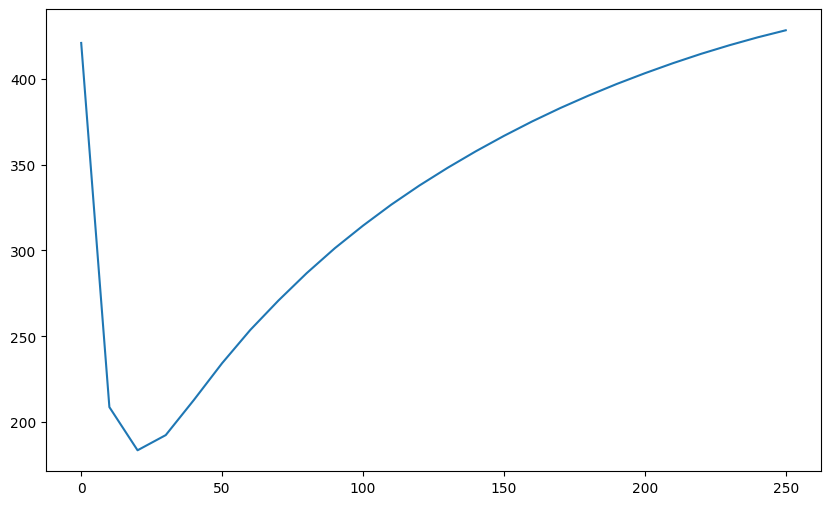

In [15]:
## choose the best m
loss_plot(X_high_noise)

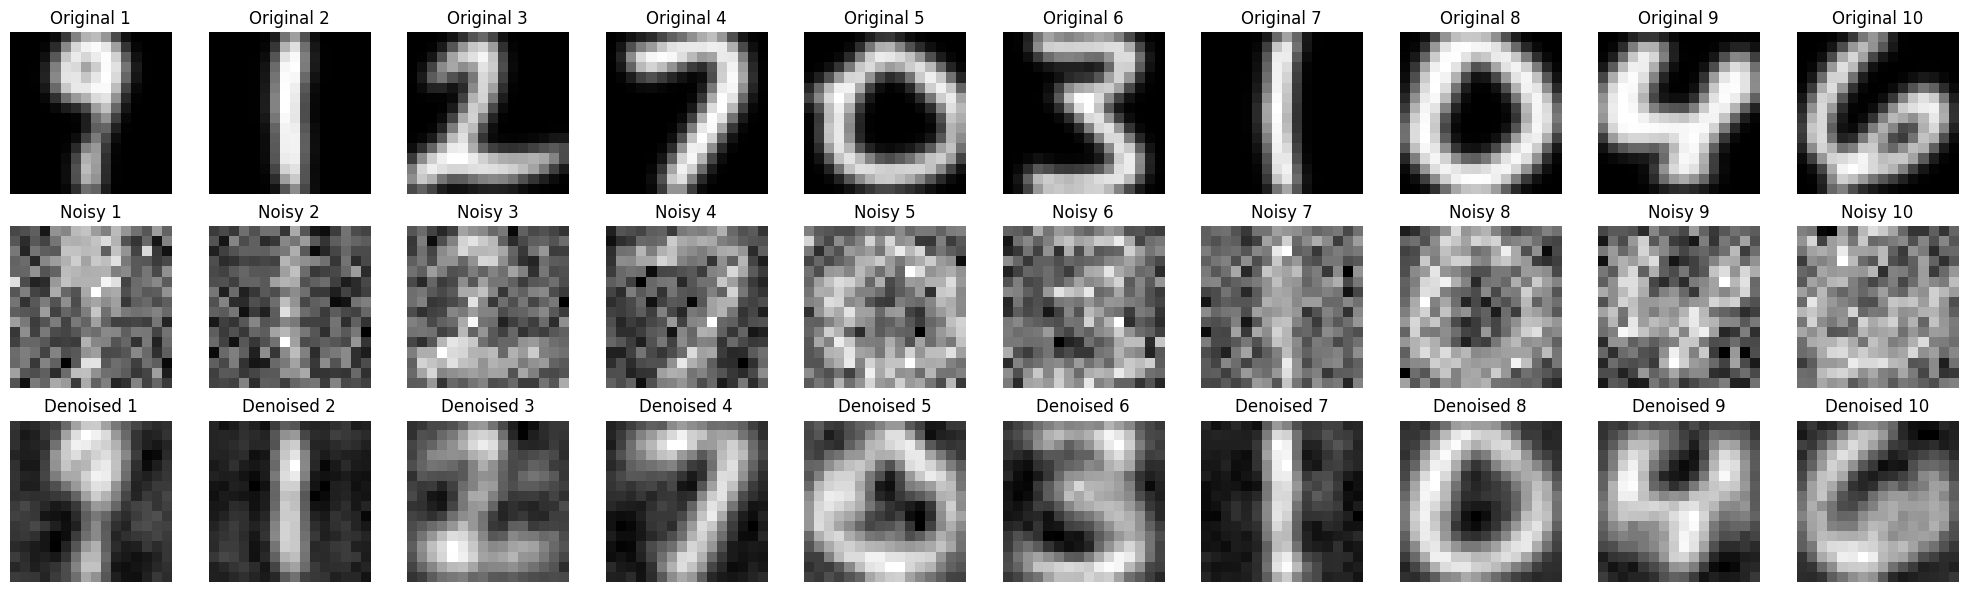

In [18]:
show_images(X, X_high_noise, Y_high_noise, 20)

(256, 5)


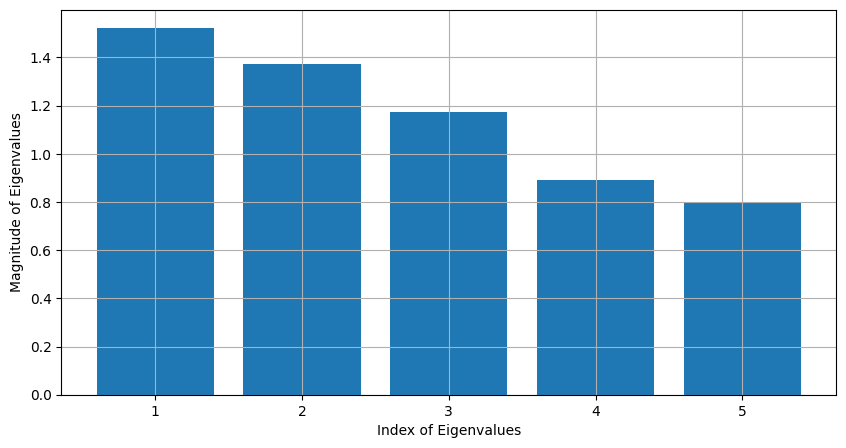

In [28]:
## choose the first 5 images of X
X_5 = X[:, :5]
print(X_5.shape)
## add strong gaussian noise
X_5_noise = add_gaussian_noise(X_5, 0.9)
## show eigen values
C_5_noise, D_5_noise, U_5_noise, Z_5_noise, Y_5_noise = pca(X_5_noise, 5)
plot_eigenvalues(D_5_noise)

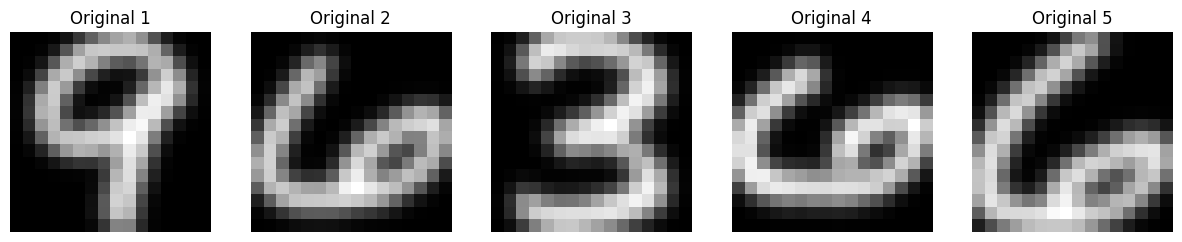

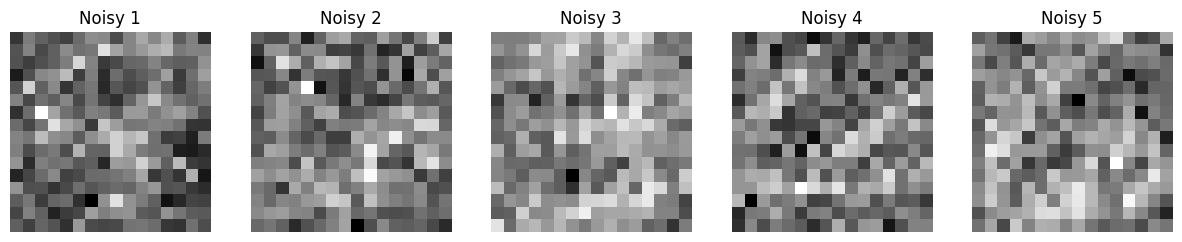

In [29]:
## plot the images and outliers
def plot_images(images, title, image_shape):
    num_images = images.shape[1]
    if num_images > 1:
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        for i in range(num_images):
            ax = axes[i]
            ax.imshow(images[:, i].reshape(image_shape), cmap='gray')
            ax.title.set_text(f'{title} {i+1}')
            ax.axis('off')
    else:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))
        ax.imshow(images[:, 0].reshape(image_shape), cmap='gray')
        ax.title.set_text(f'{title} 1')
        ax.axis('off')
    plt.show()

# Plotting the original and noisy images
plot_images(X_5, "Original", (16, 16))
plot_images(X_5_noise, "Noisy", (16, 16))